In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings


In [2]:
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("C:\\Users\\ushak\\Desktop\\internship_project\\datasets\\car details v4.csv")

In [4]:
data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [5]:
data.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [6]:
data.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

In [7]:
data.describe(include=['int64','float64'])

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [8]:
data.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [9]:
data.select_dtypes(include='object').nunique()

Make              33
Model           1050
Fuel Type          9
Transmission       2
Location          77
Color             17
Owner              6
Seller Type        3
Engine           108
Max Power        335
Max Torque       290
Drivetrain         3
dtype: int64

In [10]:
numcols=['Length','Width','Height','Seating Capacity','Fuel Tank Capacity']

In [11]:
imputer=SimpleImputer()
data[numcols]=imputer.fit_transform(data[numcols])
data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.00000
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.00000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.00000
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.00000
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.00000
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.00000
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.00000
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.00000


In [12]:
catcols=['Engine','Max Power','Max Torque','Drivetrain']

for i in catcols:
    data[i].fillna(data[i].mode()[0],inplace=True)
data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.00000
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.00000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.00000
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.00000
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.00000
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.00000
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.00000
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.00000


In [13]:
data.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [14]:
#data1=data.dropna(subset=['Engine'],how='all')
#data2=data1.dropna(subset=['Max Power'],how='all')
#data3=data2.dropna(subset=['Max Torque'],how='all')
#data4=data3.dropna(subset=['Drivetrain'],how='all')
#data5=data4.dropna(subset=['Length'],how='all')
#data6=data5.dropna(subset=['Width'],how='all')
#data7=data6.dropna(subset=['Height'],how='all')
#data8=data7.dropna(subset=['Seating Capacity'],how='all')
#data9=data8.dropna(subset=['Fuel Tank Capacity'],how='all')

In [15]:
#data9

In [16]:
data.duplicated().sum()

0

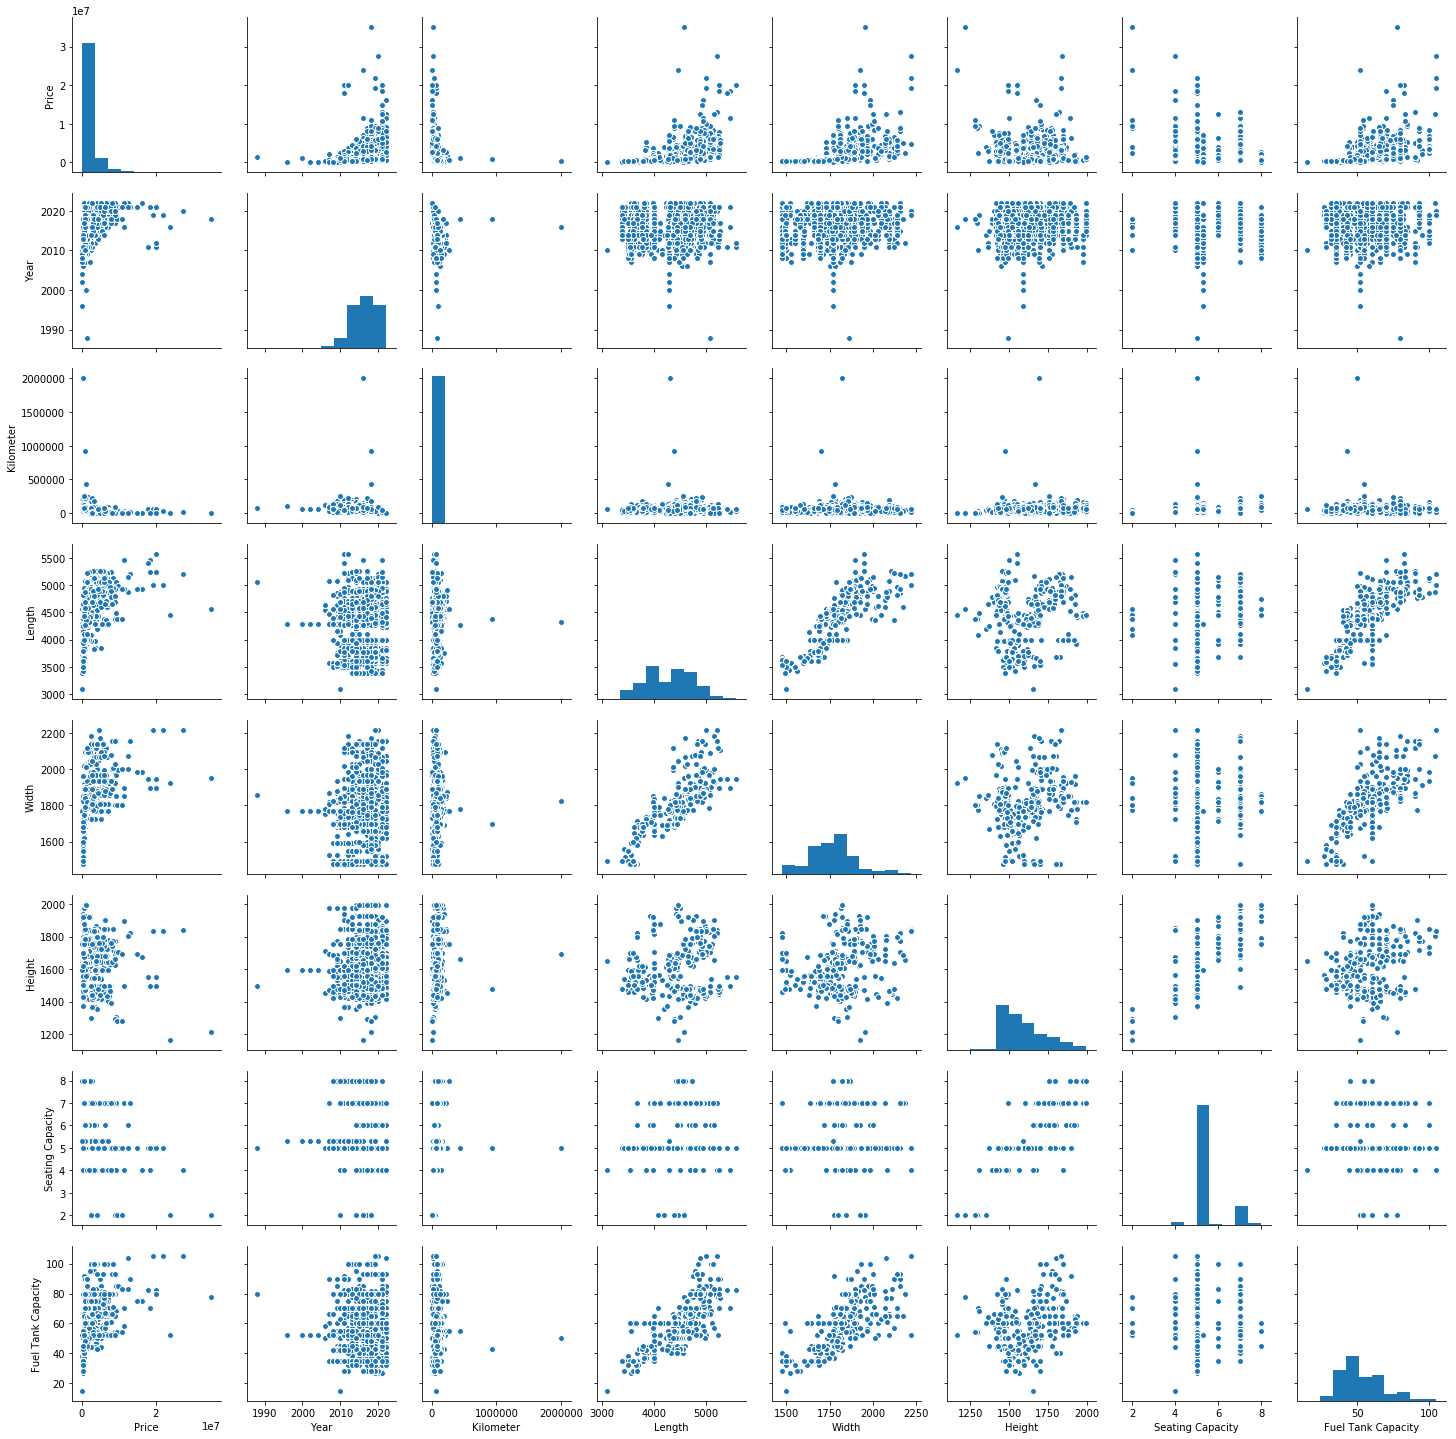

In [17]:
sns.pairplot(data)

In [18]:
data.shape

(2059, 20)

In [19]:
numcols=['Kilometer', 'Length', 'Width','Height','Seating Capacity','Fuel Tank Capacity']

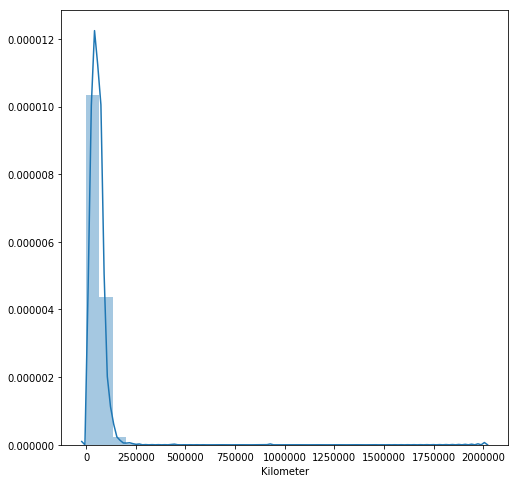

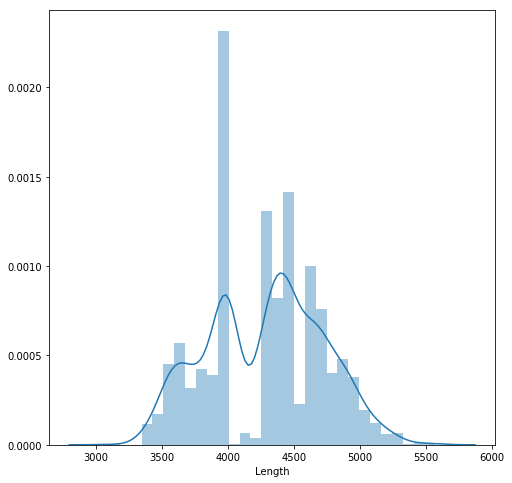

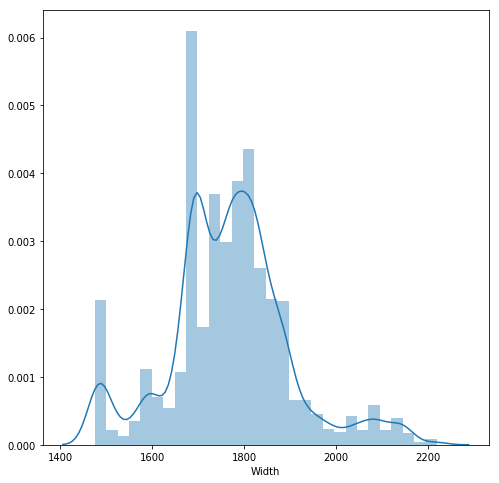

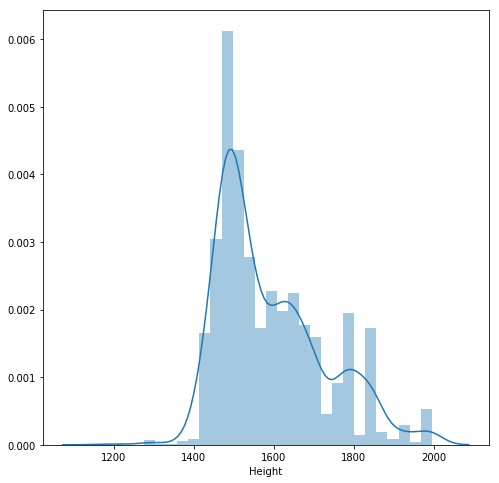

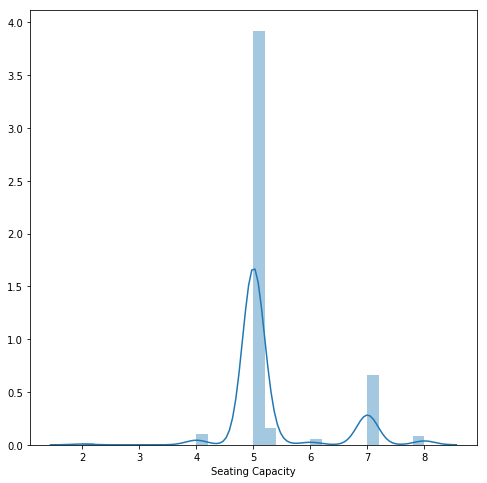

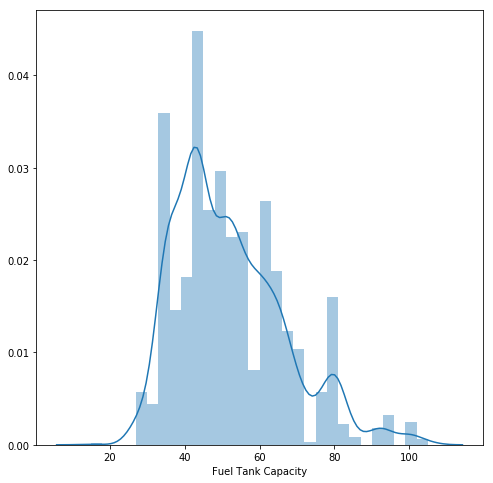

In [20]:
for col in numcols:
    plt.figure(figsize = (8, 8))
    sns.distplot(data[col],bins=30)
    plt.show()

In [21]:
scaler = StandardScaler()
data[['Kilometer', 'Length', 'Width','Height','Seating Capacity','Fuel Tank Capacity']]=scaler.fit_transform(data[['Kilometer', 'Length', 'Width','Height','Seating Capacity','Fuel Tank Capacity']])


In [22]:
data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,0.574133,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,-0.668002,-0.661029,-0.647719,-0.378532,-1.157720e+00
1,Maruti Suzuki,Swift DZire VDI,450000,2014,0.362268,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,-0.656519,-0.548343,-0.274331,-0.378532,-6.810738e-01
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,0.222769,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,-1.598142,-1.299581,-0.311670,-0.378532,-1.157720e+00
3,Toyota,Glanza G,799000,2019,-0.291637,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,-0.656519,-0.172724,-0.610380,-0.378532,-1.021535e+00
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,0.257644,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,1.042995,0.465828,1.517933,2.093385,2.041265e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,0.629061,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,0.698499,0.916571,1.443255,2.093385,1.225512e+00
2055,Hyundai,Eon D-Lite +,275000,2014,0.501768,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,-1.804840,-1.637638,-0.685058,-0.378532,-1.361997e+00
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,0.327393,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,-1.115847,-0.661029,-1.230205,-0.378532,-4.767968e-01
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,0.108972,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,1.504620,0.751298,-0.841881,-0.378532,8.850499e-01


In [23]:
#data[numcols]= data[numcols]+ 0.1

In [24]:
#for col in numcols:
#    data[col] = np.log(data[col])
    
   
    
#data

In [25]:
#from sklearn.preprocessing import QuantileTransformer
#qt = QuantileTransformer(n_quantiles=100, output_distribution='normal')

In [26]:
#data[numcols] = qt.fit_transform(data[numcols])

In [27]:
#data.head()

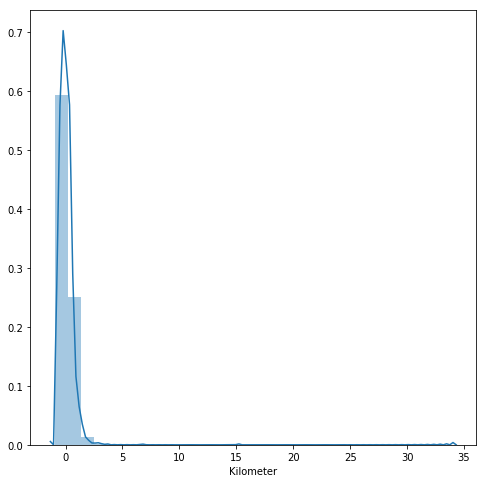

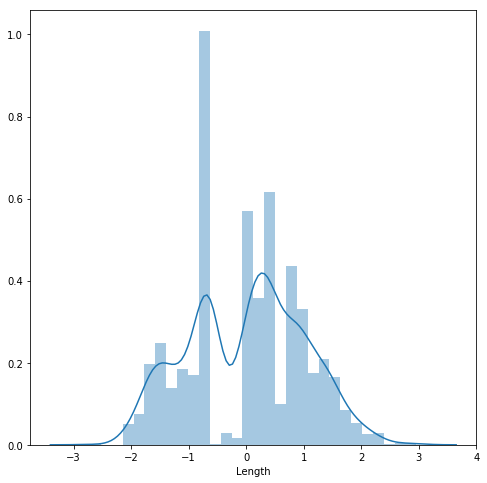

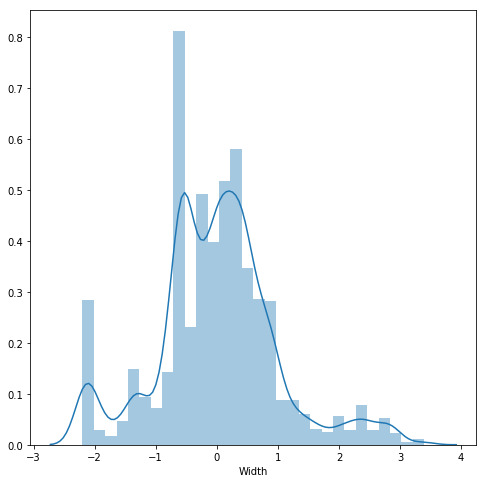

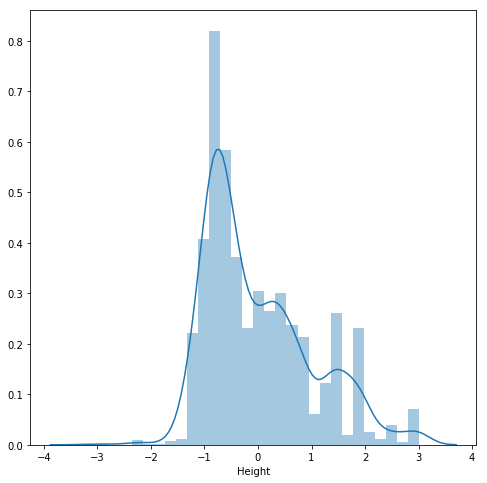

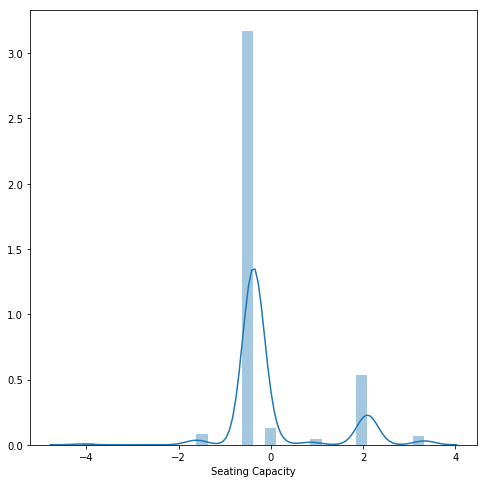

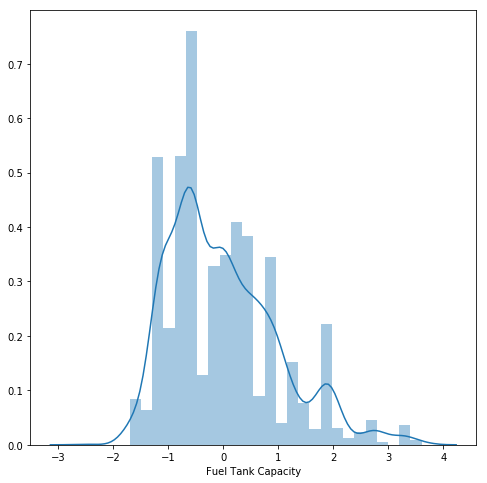

In [28]:
for col in numcols:
    plt.figure(figsize = (8, 8))
    sns.distplot(data[col],bins=30)
    plt.show()

In [29]:
numeric_cols = data.select_dtypes(include='number')

#Calculate the first and third quartiles for each column
q1 = numeric_cols.quantile(0.25)
q3 = numeric_cols.quantile(0.75)

#Calculate the IQR for each column
iqr = q3 - q1

#Define the outlier bounds for each column
lower_bounds = q1 - 1.5 * iqr
upper_bounds = q3 + 1.5 * iqr

# Filter out rows that fall outside the bounds for each column
for col in numeric_cols.columns:
    data = data[(data[col] >= lower_bounds[col]) & (data[col] <= upper_bounds[col])]

# Print the filtered DataFrame
data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,0.574133,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,-0.668002,-0.661029,-0.647719,-0.378532,-1.157720
1,Maruti Suzuki,Swift DZire VDI,450000,2014,0.362268,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,-0.656519,-0.548343,-0.274331,-0.378532,-0.681074
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,0.222769,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,-1.598142,-1.299581,-0.311670,-0.378532,-1.157720
3,Toyota,Glanza G,799000,2019,-0.291637,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,-0.656519,-0.172724,-0.610380,-0.378532,-1.021535
5,Maruti Suzuki,Ciaz ZXi,675000,2017,0.332886,Petrol,Manual,Pune,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,0.480318,-0.285410,-0.797074,-0.378532,-0.612981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,Maruti Suzuki,Vitara Brezza VXi,925000,2021,-0.108543,Petrol,Manual,Bangalore,White,First,Individual,1462 cc,103 bhp @ 6000 rpm,138 Nm @ 4400 rpm,FWD,-0.656519,0.165333,0.360429,-0.378532,-0.272520
2052,Hyundai,i20 Sportz 1.4 CRDI,409999,2014,0.240206,Diesel,Manual,Agra,Silver,First,Individual,1396 cc,90@4000,220@1750,FWD,-0.782834,-0.435658,-0.647719,-0.378532,-0.476797
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,0.432018,Petrol,Manual,Faridabad,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,-1.161780,-0.661029,0.211074,-0.378532,-0.612981
2055,Hyundai,Eon D-Lite +,275000,2014,0.501768,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,-1.804840,-1.637638,-0.685058,-0.378532,-1.361997


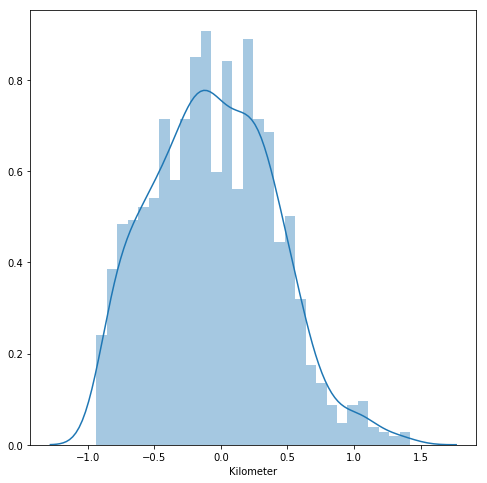

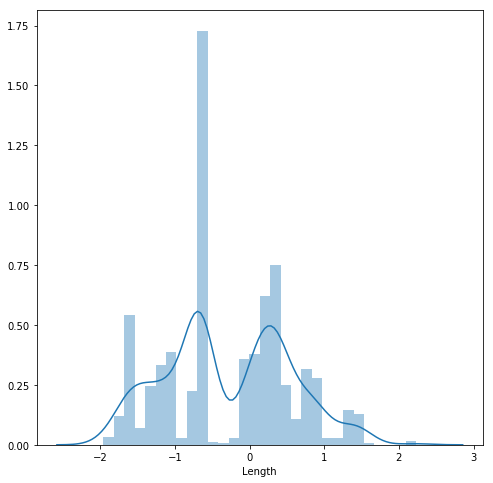

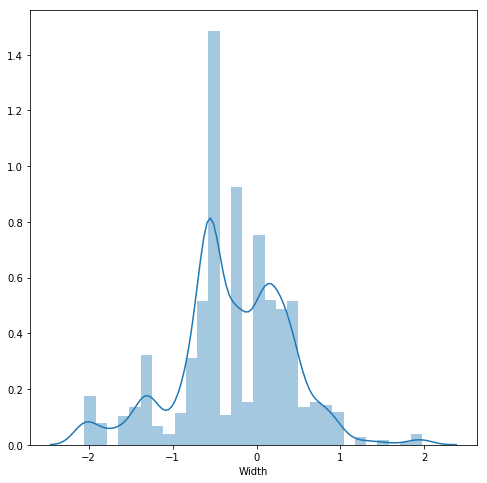

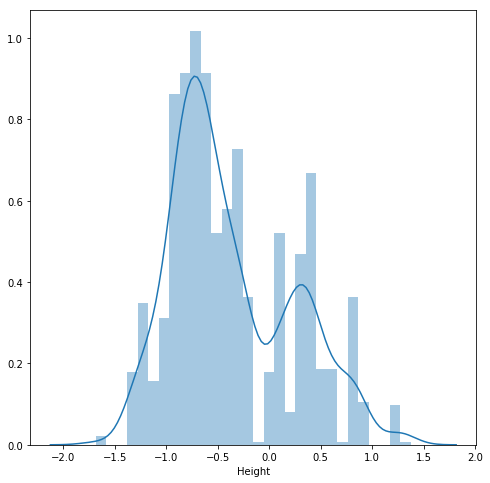

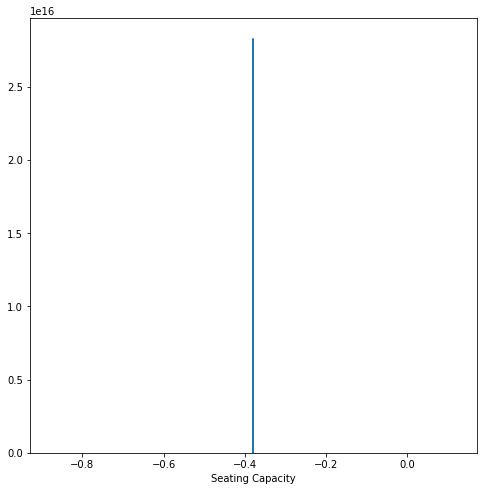

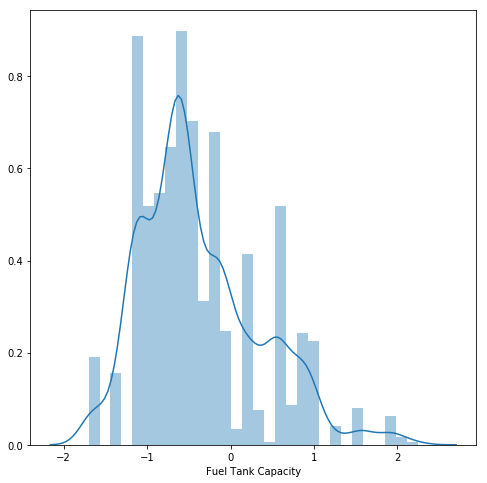

In [30]:
for col in numcols:
    plt.figure(figsize = (8, 8))
    sns.distplot(data[col],bins=30)
    plt.show()

In [31]:
data.select_dtypes(include='object').nunique()

Make             25
Model           667
Fuel Type         6
Transmission      2
Location         72
Color            17
Owner             6
Seller Type       3
Engine           67
Max Power       192
Max Torque      173
Drivetrain        3
dtype: int64

In [32]:
catcols=['Make','Model','Fuel Type','Transmission','Location','Color','Owner','Seller Type','Engine','Max Power','Max Torque','Drivetrain']

In [33]:
for i in catcols:
    le=LabelEncoder()
    data[i]=le.fit_transform(data[i])

In [34]:
data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,6,49,505000,2017,0.574133,4,1,53,7,1,1,7,172,4,1,-0.668002,-0.661029,-0.647719,-0.378532,-1.157720
1,16,501,450000,2014,0.362268,1,1,38,15,3,2,9,151,74,1,-0.656519,-0.548343,-0.274331,-0.378532,-0.681074
2,7,649,220000,2011,0.222769,4,1,37,8,1,2,6,161,9,1,-1.598142,-1.299581,-0.311670,-0.378532,-1.157720
3,22,323,799000,2019,-0.291637,4,1,39,13,1,2,6,165,13,1,-0.656519,-0.172724,-0.610380,-0.378532,-1.021535
5,16,132,675000,2017,0.332886,4,1,53,7,1,2,15,183,29,1,0.480318,-0.285410,-0.797074,-0.378532,-0.612981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,16,591,925000,2021,-0.108543,4,1,6,15,1,2,21,5,33,1,-0.656519,0.165333,0.360429,-0.378532,-0.272520
2052,7,666,409999,2014,0.240206,1,1,0,14,1,2,17,181,90,1,-0.782834,-0.435658,-0.647719,-0.378532,-0.476797
2053,16,448,245000,2014,0.432018,4,1,19,15,3,2,6,170,15,1,-1.161780,-0.661029,0.211074,-0.378532,-0.612981
2055,7,289,275000,2014,0.501768,4,1,1,15,3,2,62,121,153,1,-1.804840,-1.637638,-0.685058,-0.378532,-1.361997


In [35]:
corrr=data.corr().abs()

In [36]:
corrr

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Make,1.000000e+00,2.225794e-01,1.829249e-01,1.014732e-01,2.967365e-02,7.673729e-02,1.143154e-01,5.507826e-02,1.019254e-02,2.811577e-02,5.403597e-02,2.128421e-02,5.838541e-02,4.546587e-02,1.215977e-01,1.444353e-01,1.343399e-01,5.046274e-02,3.820437e-17,1.441466e-01
Model,2.225794e-01,1.000000e+00,1.967423e-01,2.953167e-02,2.065050e-02,5.814025e-02,2.297183e-01,3.022914e-02,4.301988e-02,2.050327e-02,2.333187e-02,1.276452e-01,1.193694e-01,6.071954e-03,2.225547e-01,3.269821e-01,2.184221e-01,3.487807e-01,5.488920e-17,1.400366e-01
Price,1.829249e-01,1.967423e-01,1.000000e+00,3.409935e-01,2.152149e-01,2.790810e-01,5.934891e-01,1.126765e-01,1.208074e-01,2.702215e-03,6.117475e-02,3.328493e-01,3.605969e-01,3.662881e-01,1.194245e-02,6.372595e-01,6.686440e-01,3.484274e-02,2.188350e-16,6.331596e-01
Year,1.014732e-01,2.953167e-02,3.409935e-01,1.000000e+00,5.526314e-01,5.749399e-02,8.842661e-02,4.442665e-02,2.466441e-02,2.931765e-01,4.226529e-02,2.065634e-02,7.372597e-02,2.358559e-02,3.945503e-02,1.417635e-02,1.618002e-01,2.079264e-01,1.317439e-15,4.645382e-02
Kilometer,2.967365e-02,2.065050e-02,2.152149e-01,5.526314e-01,1.000000e+00,3.247034e-01,1.185657e-01,1.735005e-02,2.894243e-02,2.299895e-01,2.184864e-02,2.462412e-02,3.787223e-02,9.156579e-02,1.436096e-02,1.234560e-01,3.048691e-02,5.063851e-02,2.033526e-16,1.402525e-01
Fuel Type,7.673729e-02,5.814025e-02,2.790810e-01,5.749399e-02,3.247034e-01,1.000000e+00,3.149047e-02,9.291888e-02,4.081522e-02,1.029098e-01,2.465248e-02,1.354184e-01,4.443002e-02,4.971627e-01,2.421961e-02,2.732731e-01,3.408908e-01,1.715209e-01,5.062869e-16,4.026435e-01
Transmission,1.143154e-01,2.297183e-01,5.934891e-01,8.842661e-02,1.185657e-01,3.149047e-02,1.000000e+00,3.070067e-02,1.207739e-01,9.981132e-02,5.001400e-02,2.840778e-01,3.397336e-01,2.356222e-01,1.849637e-02,4.534139e-01,4.336652e-01,1.461577e-01,8.934130e-16,4.428830e-01
Location,5.507826e-02,3.022914e-02,1.126765e-01,4.442665e-02,1.735005e-02,9.291888e-02,3.070067e-02,1.000000e+00,1.093404e-02,1.926379e-02,1.227809e-01,5.156026e-02,1.051166e-01,8.453294e-02,2.621913e-02,5.419811e-02,8.528137e-02,4.671048e-02,2.138273e-16,8.889456e-02
Color,1.019254e-02,4.301988e-02,1.208074e-01,2.466441e-02,2.894243e-02,4.081522e-02,1.207739e-01,1.093404e-02,1.000000e+00,3.747501e-02,6.260697e-03,5.543363e-02,6.914347e-02,4.248948e-03,8.103594e-03,1.317640e-01,1.071782e-01,1.997313e-02,2.365121e-16,1.017560e-01
Owner,2.811577e-02,2.050327e-02,2.702215e-03,2.931765e-01,2.299895e-01,1.029098e-01,9.981132e-02,1.926379e-02,3.747501e-02,1.000000e+00,4.356575e-02,7.169318e-02,4.024374e-02,1.253856e-01,1.064249e-02,8.792240e-02,3.404857e-02,4.777001e-02,2.346302e-16,8.951839e-02


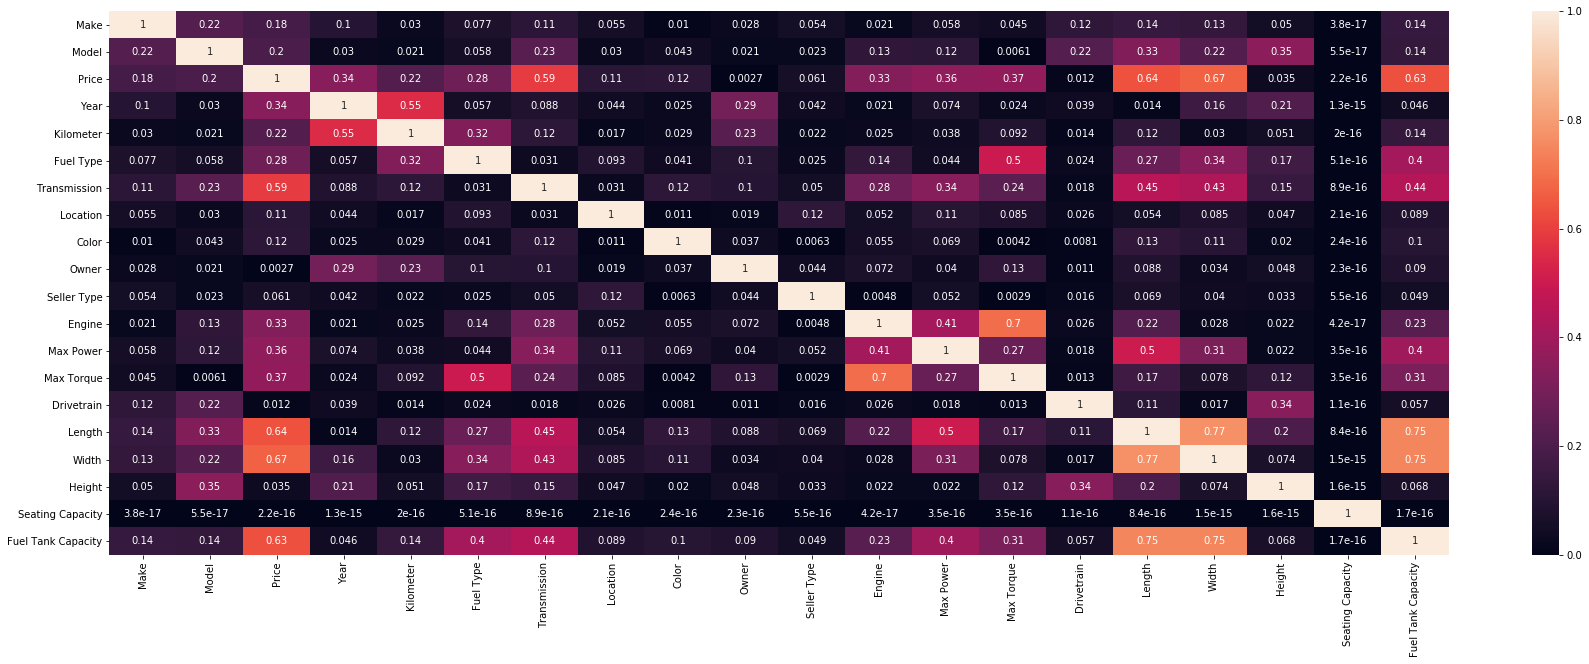

In [37]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(corrr,annot=True)
plt.show()

In [38]:
data1=data.drop(['Seating Capacity','Height','Drivetrain','Seller Type','Owner'],axis=1)

In [39]:
X = data1.drop(['Price'], axis=1)
y = data1[['Price']]


In [40]:
X

,Make,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Engine,Max Power,Max Torque,Length,Width,Fuel Tank Capacity
0,6,49,2017,0.574133,4,1,53,7,7,172,4,-0.668002,-0.661029,-1.157720
1,16,501,2014,0.362268,1,1,38,15,9,151,74,-0.656519,-0.548343,-0.681074
2,7,649,2011,0.222769,4,1,37,8,6,161,9,-1.598142,-1.299581,-1.157720
3,22,323,2019,-0.291637,4,1,39,13,6,165,13,-0.656519,-0.172724,-1.021535
5,16,132,2017,0.332886,4,1,53,7,15,183,29,0.480318,-0.285410,-0.612981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,16,591,2021,-0.108543,4,1,6,15,21,5,33,-0.656519,0.165333,-0.272520
2052,7,666,2014,0.240206,1,1,0,14,17,181,90,-0.782834,-0.435658,-0.476797
2053,16,448,2014,0.432018,4,1,19,15,6,170,15,-1.161780,-0.661029,-0.612981
2055,7,289,2014,0.501768,4,1,1,15,62,121,153,-1.804840,-1.637638,-1.361997


In [41]:
y

,Price
0,505000
1,450000
2,220000
3,799000
5,675000
...,...
2051,925000
2052,409999
2053,245000
2055,275000


In [42]:
# train and validation set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [43]:
X_trainval.shape

(1054, 14)

In [44]:
X_test.shape

(264, 14)

In [45]:
y_trainval.shape

(1054, 1)

In [46]:
y_test.shape

(264, 1)

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2,random_state=42)

In [48]:
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)



In [49]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [50]:
# r2 of train and val
y_val_pred1 = lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred1)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred1)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred1)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=1)
y_test_pred1 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred1)
print("R-squared score:", r2)
# mse of test and pred (degree=1)
mse = mean_squared_error(y_test, y_test_pred1)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred1)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.6999759710424647
Mean squared error: 171038917237.23068
Root Mean Squared Error: 413568.5157712452
Mean Absolute Error: 268579.43703993835
R-squared score: 0.7610641015410124
Mean squared error: 141186244586.84628
Root Mean Squared Error: 375747.5809461004
Mean Absolute Error: 279808.28397233767


In [51]:
min_vals = np.min(y_val, axis=0)
max_vals = np.max(y_val, axis=0)
ranges = max_vals - min_vals
ranges

Price    3805000
dtype: int64

In [52]:
min_vals = np.min(y_test, axis=0)
max_vals = np.max(y_test, axis=0)
ranges = max_vals - min_vals

In [53]:
ranges

Price    3785001
dtype: int64

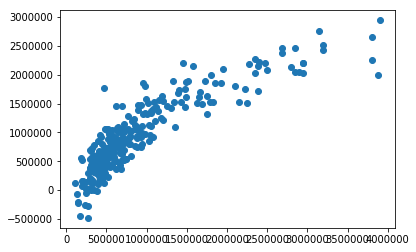

In [54]:
plt.scatter(y_test, y_test_pred1)

In [55]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)


In [56]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [57]:
# r2 of train and val
y_val_pred2= lr.predict(X_val_poly)
r2 = r2_score(y_val, y_val_pred2)
print("R-squared score:", r2)
# mse of train and val
mse = mean_squared_error(y_val, y_val_pred2)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_val, y_val_pred2)
print("Mean Absolute Error:",mae_test)
# r2 of test and pred (degree=2)
y_test_pred2 = lr.predict(X_test_poly)
r2 = r2_score(y_test, y_test_pred2)
print("R-squared score:", r2)
# mse of test and pred (degree=2)
mse = mean_squared_error(y_test, y_test_pred2)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, y_test_pred2)
print("Mean Absolute Error:",mae_test)

R-squared score: 0.8594285045323891
Mean squared error: 80137569189.83807
Root Mean Squared Error: 283085.79828355584
Mean Absolute Error: 180648.9336694174
R-squared score: 0.902726252327087
Mean squared error: 57478659420.38176
Root Mean Squared Error: 239747.07385155247
Mean Absolute Error: 158760.76009450763


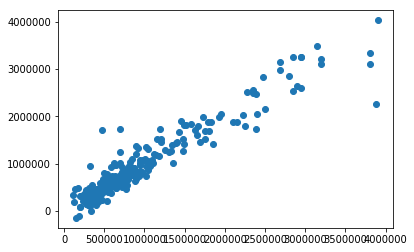

In [58]:
# mse of test and pred (degree=2)
plt.scatter(y_test, y_test_pred2)

In [59]:
min_vals = np.min(y_test, axis=0)
max_vals = np.max(y_test, axis=0)
ranges = max_vals - min_vals

In [60]:
ranges

Price    3785001
dtype: int64

In [61]:
##XGBOOST
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn import metrics

In [62]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly=poly.fit_transform(X_val)
X_test_poly = poly.transform(X_test)


In [63]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)

In [64]:
xgb_reg.fit(X_train_poly, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [65]:
y_pred = xgb_reg.predict(X_val_poly)

In [66]:
r2_sales = metrics.r2_score(y_val, y_pred)
print('R Squared value = ', r2_sales)
mse = mean_squared_error(y_val, y_pred)
print("Mean squared error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
mae=mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error:",mae)

R Squared value =  0.9110026583472889
Mean squared error: 50735966069.658
Root Mean Squared Error: 225246.45628657067
Mean Absolute Error: 135094.2633293839


In [67]:
data_prediction =xgb_reg.predict(X_test_poly)

In [68]:
# R squared Value
r2_data = metrics.r2_score(y_test, data_prediction)
print('R Squared value = ', r2_data)
mse = mean_squared_error(y_test, data_prediction)
print("Mean squared error:", mse)
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error:", rmse_test)
mae_test=mean_absolute_error(y_test, data_prediction)
print("Mean Absolute Error:",mae_test)

R Squared value =  0.9184699792163045
Mean squared error: 48175755630.59776
Root Mean Squared Error: 219489.76201772547
Mean Absolute Error: 128355.44767992424


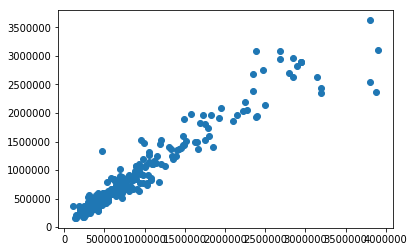

In [69]:
plt.scatter(y_test, data_prediction)

In [70]:
y_test

,Price
1065,475000
1529,1670000
955,2400000
57,2475000
2005,450000
...,...
1575,940000
1559,1190000
2003,399000
844,650000


In [71]:
results=pd.DataFrame(data_prediction)

In [72]:
results

,0
0,4.707763e+05
1,1.370790e+06
2,1.949475e+06
3,2.757208e+06
4,4.553239e+05
...,...
259,1.044740e+06
260,1.448546e+06
261,5.684391e+05
262,5.906053e+05
